# Data visualization with Matpotlib: Scatter plots

**Created by: Kirstie Whitaker**

**Created on: 29 July 2019**

In 2017 Michael Vendetti and I published a paper on *"Neuroscientific insights into the development of analogical reasoning"*.
The code to recreate the figures from processed data is available at https://github.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017.

This tutorial is going to recreate figure 2 which outlines the behavioral results from the study.

![](https://raw.githubusercontent.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017/master/FIGURES/Figure2_lowres.png)

### Take what you need

The philosophy of the tutorial is that I'll start by making some very simple plots, and then enhance them up to "publication standard".

You should take _only the parts you need_ and leave the rest behind.
If you don't care about fancy legends, or setting the number of minor x ticks, then you can stop before we get to that part.

The goal is to have you leave the tutorial feeling like you know _how_ to get started writing code to visualize and customise your plots.

## Import modules

We're importing everything up here.
And they should all be listed in the [requirements.txt](requirements.txt) file in this repository.
Checkout the [README](README.md) file for more information on installing these packages.

In [1]:
from IPython.display import display
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import string

## The task

In this study we asked children and adolescents (ages 6 to 18 years old) to lie in an fMRI scanner and complete an visual analogical reasoning task.

There were two types of questions.

* The **analogy** questions (shown in panel a in the figure below) asked "Which of the pictures at the bottom goes together with the 3rd picture *in the same way* that the two pictures at the top go together?"

* The **semantic** questions (shown in panel b in the figure below) were the control questions and the participants were simply asked asked "Which of the pictures below goes best with the picture at the top?"

![](https://raw.githubusercontent.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017/master/FIGURES/Figure1_lowres.png)

The answers to the **analogy** question are grouped into four different types:

* a **semantic** lure: milk comes from a cow...but that relationship is not the same as the one between dress and wardrobe
* a **perceptual** lure: the milk carton looks perceptually similar to the clock (but isn't semantically related)
* an **unrelate** lure: the tennis racket has nothing to do with any of the pictures at the top 
* a **correct** answer: a dress is stored in a wardrobe, the milk is stored in the **fridge**

There are three answer types for the **semantic** question:

* a **correct** answer: the pen write on the notepad
* two **unrelated** lures: tea and sweetcorn have nothing to do with notepaper
* a **perceptual** lure: the shower curtain looks like the notepad (but isn't semantically related)

### Hypotheses

1. Accuracy on both tasks will increase (at a decreasing rate) with age, and accuracy will be higher for the semantic task compared to the analogy task.
2. Reaction time on both tasks will decrease (at a decreasing rate) with age, and reaction time will be smaller (faster) for the semantic task compared to the analogy task.
3. There will be more semantic errors than perceptual errors, and more perceptual errors than unrelated errors across all ages, although the number of errors will decrease with age (corresponding to an increase in accuracy). 

## With great power comes great responsibility

I've listed some hypotheses above.
We can't confirm or reject them by visualizing the data.

Just because a line _looks_ like it is going up or down, doesn't mean it is statistically significantly doing so.

You can tell many stories with a picture...including ones that mislead people very easily.

Be careful!

## The data

The data is stored in the [DATA/WhitakerVendetti_BehavData.csv](https://github.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017/blob/master/DATA/WhitakerVendetti_BehavData.csv) file in the [NORA_WhitakerVendetti_DevSci2017](https://github.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017) GitHub repository.

I've made a copy of it in this repository so you don't have to go and get it from the web 😊

The important columns are:

* `subid_short`
* `Age_scan`
* `R1_percent_acc`
* `R2_percent_acc`
* `R1_meanRTcorr_cor`
* `R2_meanRTcorr_cor`
* `R2_percent_sem`
* `R2_percent_per`
* `R2_percent_dis`

The `R1` trials are the semantic trials (they have one relationship to process).

The `R2` trials are the analogy trials (they have two relationships to process).

**Accuracy** is the percentage of correct trials from all the trials a participant saw.

**Reaction time** is the mean RT of the _correct_ trials, corrected for some obvious outliers.

The **semantic**, **perceptual** and **unrelated** (née "distractor") errors are reported as percentages of all the trials the participant saw.

In [2]:
# Read in the data
df = pd.read_csv('data/WhitakerVendetti_BehavData.csv')

# Take a look at the first 5 rows
print ('====== Here are the first 5 rows ======')
display(df.head())

# Print all of the columns - its a big wide file 😬
print ('\n\n\n====== Here are all the columns in the file======')
display(df.columns)

# Lets just keep the columns we need
keep_cols = ['subid_short', 'Age_scan',
             'R1_percent_acc', 'R2_percent_acc',
             'R1_meanRTcorr_cor', 'R2_meanRTcorr_cor',
             'R2_percent_sem', 'R2_percent_per', 'R2_percent_dis']
df = df.loc[:, keep_cols]

# And now lets see the summary information of this subset of the data
print ('\n\n\n====== Here are some summary statistics from the columns we need ======')

display(df.describe())

====== Here are the first 5 rows ======


,subroot,occ,subid_long,subid_short,subnumber,Male,Age_scan,R1_num_cor,R1_num_sem,R1_num_per,...,R2_meanRT_dis,R2_meanRTcorr_cor,R2_meanRTcorr_sem,R2_meanRTcorr_per,R2_meanRTcorr_dis,R2_percent_sem,R2_percent_per,R2_percent_dis,R2_Correct_dividedby_Semantic,R2_Semantic_dividedby_per_dis
0,n001,1,nora_n001t1,n001_t1,1,0,12.17,38,NaN,0,...,3.91,4.28,6.46,4.9,NaN,12.50000,7.500000,2.500000,6.2,1.25
1,n002,1,nora_n002t1,n002_t1,2,0,9.53,27,NaN,3,...,1.92,3.68,3.55,NaN,NaN,23.33333,3.333333,3.333333,3.0,3.50
2,n004,1,nora_n004t1,n004_t1,4,0,15.17,39,NaN,0,...,NaN,4.25,5.69,NaN,NaN,5.00000,2.500000,0.000000,18.5,2.00
3,n005,1,nora_n005t1,n005_t1,5,0,18.02,38,NaN,0,...,NaN,5.08,NaN,NaN,NaN,0.00000,2.500000,0.000000,39.0,0.00
4,n009,1,nora_n009t1,n009_t1,9,0,15.55,38,NaN,0,...,NaN,3.84,5.42,NaN,NaN,7.50000,2.500000,0.000000,12.0,3.00





====== Here are all the columns in the file======


Index(['subroot', 'occ', 'subid_long', 'subid_short', 'subnumber', 'Male',
       'Age_scan', 'R1_num_cor', 'R1_num_sem', 'R1_num_per', 'R1_num_dis',
       'R1_num_resp', 'R1_num_omi', 'R1_tot_num_q', 'R1_percent_acc',
       'R1_num_err_incomi', 'R1_percent_err_incomi', 'R1_num_err_excomi',
       'R1_percent_err_excomi', 'R1_percent_err_sem_incomi',
       'R1_percent_err_per_incomi', 'R1_percent_err_dis_incomi',
       'R1_percent_err_discorr_incomi', 'R1_percent_err_omi_incomi',
       'R1_percent_err_sem_excomi', 'R1_percent_err_per_excomi',
       'R1_percent_err_dis_excomi', 'R1_percent_err_discorr_excomi',
       'R1_percent_resp_cor', 'R1_percent_resp_sem', 'R1_percent_resp_per',
       'R1_percent_resp_dis', 'R1_percent_resp_discorr', 'R1_meanRT_cor',
       'R1_meanRT_sem', 'R1_meanRT_per', 'R1_meanRT_dis', 'R1_meanRTcorr_cor',
       'R1_meanRTcorr_sem', 'R1_meanRTcorr_per', 'R1_meanRTcorr_dis',
       'R2_num_cor', 'R2_num_sem', 'R2_num_per', 'R2_num_dis', 'R2_num_resp',





====== Here are some summary statistics from the columns we need ======


,Age_scan,R1_percent_acc,R2_percent_acc,R1_meanRTcorr_cor,R2_meanRTcorr_cor,R2_percent_sem,R2_percent_per,R2_percent_dis
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,11.040290,89.384058,74.949275,3.598333,4.667681,12.238945,5.067819,2.809829
std,3.642674,12.514705,18.960706,0.993282,1.004570,9.624469,4.832727,3.486125
min,6.160000,35.000000,15.000000,1.760000,2.450000,0.000000,0.000000,0.000000
25%,7.830000,85.000000,60.000000,2.797500,4.002500,5.000000,2.500000,0.000000
50%,10.430000,95.000000,80.000000,3.430000,4.685000,10.000000,5.000000,2.500000
75%,13.992500,98.000000,90.000000,4.172500,5.317500,20.000000,7.500000,5.000000
max,18.850000,100.000000,98.000000,6.430000,7.140000,40.000000,22.500000,20.000000


## A quick scatter plot

The first thing we'll do is take a look at our first hypothesis: that accuracy increase with age and that the analogy task is harder than the semantic task.

Lets start by making a scatter plot with **age** on the x axis and **semantic accuracy** on the y axis.

Cool, what about the accuracy on the analogy task?

That's nice, but it would probably be more useful if we put these two on the _same_ plot.

Woah, that was very clever!

Matplotlib didn't make two different plots, it assumed that I would want these two plots on the same axis because they were in the same cell.

If I had called `plt.show()` inbetween the two lines above I would have ended up with two plots: 

## Being a little more explicit

The scatter plot above shows how easy it is to plot some data - for example to check whether you have any weird outliers or if the pattern of results generally looks the way you'd expect.

You can stop here if your goal is to explore the data ✨

But some times you'll want to have a bit more control over the plots, and for that we'll introduce the concepts of a matplotlib `figure` and an `axis`.

To be honest, we aren't really going to introduce them properly because that's a deeeeeep dive into the matplotlib object-orientated architecture.
There's a nice tutorial at [https://matplotlib.org/users/artists.html](https://matplotlib.org/users/artists.html), but all you need to know is that a **figure** is a figure - the canvas on which you'll make your beautiful visualisation - and it can contain multiple **axes** displaying different aspects or types of data.

In fact, that makes it a little easier to understand why the way that many people create a figure and an axis is to use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) command.
(And here's a [stack overflow answer](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python) which explains it in a little more depth.)

If you run the command all by itself, you'll make an empty axis which takes up the whole figure area:

Lets add our plots to a figure:

Did you see that this time we changed `plt.scatter` to `ax.scatter`? 

That's because we're being more specific about _where_ we want the data to be plotted.
Specifically, we want it on the first (only) axis in our figure.

We also got explicit about telling jupyter to show the plot with `plt.show()`.
You don't need this, but its good practice for when you start coding lots of plots all in one go and don't want them to all appear on the same axis 😂

## Let's add a regression line

In my paper I modelled the data with a quadratic (yeah, yeah, suboptimal, I know).

I used [`statsmodels`](https://www.statsmodels.org/stable/index.html) to fit the model and to get the predicted values.

In [3]:
# Add a column to our data frame for the Age_scan squared
df['Age_scan_sq'] = df['Age_scan']**2

# Semantic
formula_sem = 'R1_percent_acc ~ Age_scan_sq + Age_scan'
mod_sem = ols(formula=formula_sem, data=df)
results_sem = mod_sem.fit()
print(results_sem.summary())
predicted_sem = results_sem.predict()
print(predicted_sem)

# Analogy
formula_ana = 'R2_percent_acc ~ Age_scan_sq + Age_scan'
mod_ana = ols(formula=formula_ana, data=df)
results_ana = mod_ana.fit()
print(results_ana.summary())
predicted_ana = results_ana.predict()
print(predicted_ana)

                            OLS Regression Results                            
Dep. Variable:         R1_percent_acc   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     52.90
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.08e-17
Time:                        13:26:47   Log-Likelihood:                -504.09
No. Observations:                 138   AIC:                             1014.
Df Residuals:                     135   BIC:                             1023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.3903      8.738      2.791      

Lets plot that modelled pattern on our scatter plot.

Hmmmm, that looks ok....but usually we'd draw these predicted values as a line rather than individual points.
And they'd be the same color.

To connect up the dots, we're going to use `ax.plot` instead of `ax.scatter`.

Woah! That's not right.

We forgot to sort the data into ascending order before we plotted it so we've connected all the points in the order that the participants joined the study....which is not a helpful ordering at all.

So instead, lets add the predicted values to our data frame and sort the data before we plot it:

In [4]:
df['R1_percent_acc_pred'] = predicted_sem
df['R2_percent_acc_pred'] = predicted_ana

df = df.sort_values(by='Age_scan', axis = 0)

Cool!
But those lines aren't very easy to see.

Let's make them a little thicker.

## Add a legend

These two lines aren't labelled!
We don't know which one is which.

So lets add a legend to the plot.

The function is called `ax.legend()` and we don't tell it the labels directly, we actually add those as _attributes_ of the scatter plots by adding `label`s.

So that's pretty cool.
Matplotlib hasn't added the regression lines to the legend, only the scatter plots, because they have labels.

The legend positioning is also very clever, matplotlib has put it in the location with the fewest dots!

Here's the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) that shows you how to be explicit about where to put the legend.
The default value for `loc` is `best`, and we can happily keep that for the rest of this notebook.

If you really wanted to put it somewhere else, you can set the location explicitly.
For example, in the center on the right hand side.

## Change the colors

The fact that our semantic data (dots) and predicted values (line) are both blue, and that the analogy data are both orange, is a consequence of the order in which we've asked matplotlib to plot the data.

At the moment, matplotlib is coloring the first scatter plot with its first default color, and the second with the second default color.

Then when we give it a different type of plot (`plot` vs `scatter`) it starts the color cycle again.
(You can see the order of the colours in the [documentation of when they were introduced](https://matplotlib.org/3.1.1/users/dflt_style_changes.html#colors-in-default-property-cycle).)

If we move the order of the two regression lines the colours will change:

So that's no good!

Let's explicitly set the colors.

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(0.30196078431372547, 0.6862745098039216, 0.2901960784313726)
(0.596078431372549, 0.3058823529411765, 0.6392156862745098)
(1.0, 0.4980392156862745, 0.0)


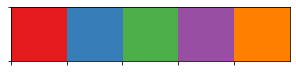

In [5]:
color_list = sns.color_palette("Set1", n_colors=5)

for color in color_list:
    print(color)

sns.palplot(color_list)

Cool....the colours are fixed....but wow those aren't nice to look at 😕

## Color management with Seaborn

[Seaborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
It provides a high-level interface for drawing attractive and informative statistical graphics.

It does many beautiful things (a few of which we're going to explore) but it can sometimes be so clever that it becomes a little opaque.

If in doubt, remember that seaborn will almost always return an `axis` object for you, and you can change those settings just as you would in matplotlib.

One of the very nice things that seaborn does is manage colors easily.

The red and blue that I used in the published figure came from the ["Set1" Brewer color map](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=5).

We can get the RGB values for the colors in this qualitative color map from seaborn's `color_palette` function, and visualize them using the "palette plot" (`palplot`) function.

Ok, now that we have our much nicer colors, let's change the red and blue in our accuracy plot.

## Really jazzing up the plot with seaborn

Another other two really beautiful things that seaborn can do is set the **context** of the plot, and the figure **style**.

There are lots of great examples in the [aesthetics tutorial](https://seaborn.pydata.org/tutorial/aesthetics.html) which I really encourage you to have a play around with.

Let's check out the `poster` context, with a `darkgrid` background.

Now that we've run the code above, lets re-make our scatter plot:

Wowzers trousers. 
That's no good 😬

How about `notebook` context with a `ticks` background?

Fun, we've got back to the matplotlib default!

The settings have changed slightly since I wrote the original code in 2016, but I think the closest setting is `notebook` context with a `font_scale` of 1.5 and the `white` style.

When you run the `set_context` and `set_style` commands they become global settings for all plots that you subsequently make in the same notebook (or script).

Personally I load them in at the top of all my notebooks because I think they make the plots look nicer 💁‍♀️

Oh, and I like the plots [despined](https://seaborn.pydata.org/tutorial/aesthetics.html#removing-axes-spines) too, so lets do that real quick:

## Axis labels, limits and tick placement

### Labels

Our plots don't have any axis labels!
How will anyone know what they're looking at?!

Let's go ahead and label them 😸

### Limits

One of the things that's really nice to do is to be able to set the min and max values for a figure.

At the moment, matplotlib is guessing at a good place to start and stop the axes.
And it's doing a great job...but what if you wanted to show a subset of the data?
If the minimum or maxium age or reaction time values were different then you'd end up with slightly different dimensions on the x and y axes.

Let's see what it's guessing:

To be honest, its doing a great job.

I'd be inclined to leave it, but I wrote a little function to pad the axes by 5% of the data range and I think its useful for times when matplotlib isn't choosing sensibly,  so let me show you how it works anyway.

In [6]:
def get_min_max(data, pad_percent=5):
    """
    Calculate the range of the data by subtracting the minimum from the maximum value.
    
    Subtract pad_percent of the range from the minimum value.
    Add pad_percent of the range to the maximum value.
    
    Default value for pad_percent is 5 which corresponds to 5%.
    
    Return the padded min and max values.
    """
    data_range = np.max(data) - np.min(data)
    data_min = np.min(data) - (data_range * pad_percent/100.0)
    data_max = np.max(data) + (data_range * pad_percent/100.0)

    return data_min, data_max

You could set `pad_percent` to 0 to get rid of all the white space if you wanted to.

(You shouldn't though, it has cut off a bunch of the dots!)

### Tick placement

Seaborn and matplotlib have made a good guess at where to put the x and y ticks, but I don't think they're the most intuitive way of illustrating a 6 to 18 year age range.

So lets just put the ticks where I think they should be: at 6, 10, 14 and 18.

For the y ticks we can use the ticker `locator_params` to put them in the best place for getting a maximum of 6 ticks.

This is basically what matplotlib is already doing, but I'll show you the command just in case you want to use it in the future.

For example, if you wanted to force the plot to have 4 bins, you'd set `nbins` to 4:

And note that even when we set `nbins` to 6 (as I wrote in the original figure code), it actually only gives us 5 ticks, because matplotlib - correctly - can't find a sensible way to parse the range to give us 6 evenly spaced ticks on they y axis.

One quick point to remember here: the x and y axis **limits** are not the same as the **tick locations**.
The limits are the edges of the plot.
The tick locations are where the markers sit on the axes.

## Adding confidence intervals with seaborn

We're doing great.
Matplotlib has got us to a pretty nice looking plot.

But, a responsible visualization should have some error bars on it....and they are a pain to try to write ourselves.

So at this point, we're going to replace our `scatter` and `plot` functions (and all the code used to calculate the predicted values) with the wonderful [`regplot` function](https://seaborn.pydata.org/generated/seaborn.regplot.html) in seaborn.

Doh, that's not right.
We've fitted a straight line to data that is clearly reaching ceiling.

Fortunately, `regplot` take a parameter, `order=2`, to make the fitted line follow a quadratic function.

## Advanced legend-ing

Those dots in the legend aren't great: they look like they correspond to data points!

The following function replaces those dots with a line the same color as the colors we've used for the regplots.

I think this is some pretty hardcore matplotlib, and you _really_ only need it when you want to publish your figure.

There's a [matplotlib legend guide](https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html) if you want to dig into what's going on here...but be warned that it gets intense pretty quickly. 

In [7]:
def add_line_to_legend(ax, color_list, label_list, loc='best', frameon=True):
    """
    Add a legend that has lines instead of markers.
    """
    line_list = []
    for color, label in zip(color_list, label_list):
        line_list += [mlines.Line2D([], [], color=color, marker=None, label=label)]
    ax.legend(handles=line_list, loc=loc, frameon=frameon)

    return ax

Yeaaaaah!
You did it!

The figure looks just like the published one.... except that that one has a bunch of other plots too!

![](https://raw.githubusercontent.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017/master/FIGURES/Figure2_lowres.png)


## A second plot: Reaction time

A second hypothesis that we had was that participants would answer faster as they got older (reaction time would decrease) and that they would be **slower** (high RT) for the analogy trials.

These data are shown in the second panel in the published figure.

It's actually super similar to the first panel, we're just plotting two different variable from the data frame.

Let's see what happens if we change the plotting code to have a different variable:

🚀🌟🚀🌟🚀🌟🚀🌟🚀🌟🚀🌟

Fantastic!
We've made the second panel!
Just like that.

## Third plot: Errors

The third hypothesis that we want to test is that there are more semantic errors than perceptual errors, and more perceptual errors than unrelated errors.

As accuracy is increasing, the separate modelled lines (quadratic again) will all decrease.



## One function to plot them all

Do you remember how our figure plotting code was really similar across the three panels?

I think we can make a general function for our plots.

In [8]:
def visan_behav_plot(ax, behav_var_list, label_list, color_list, y_ax_label, legend_rev=False):
    """
    Plot the visual analogy behavioural results on a given axis (ax)
    """
    
    # Get the min and max values for the x and y axes
    x_min, x_max = get_min_max(df['Age_scan'])
    y_min, y_max = get_min_max(df[behav_var_list[-1]])

    # Loop over all the behavioural measures you want to plot
    for behav_var, label, color in zip(behav_var_list, label_list, color_list):
        sns.regplot(df['Age_scan'], df[behav_var],
                    label = label,                      
                    color = color,
                    ax = ax,
                    order = 2)
    
    # Set the x and y tick locations
    ax.set_xticks([6, 10, 14, 18]) 
    ax.locator_params(nbins=6, axis='y')
    
    # Set the x and y min and max axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Set the x and y labels
    ax.set_xlabel('Age (years)') 
    ax.set_ylabel(y_ax_label)
    
    # Add a legend
    if legend_rev:
        color_list = color_list[::-1]
        label_list = label_list[::-1]
        
    ax = add_line_to_legend(ax,
                            color_list,
                            label_list,
                            loc='best',
                            frameon=False)
    sns.despine()
    
    return ax

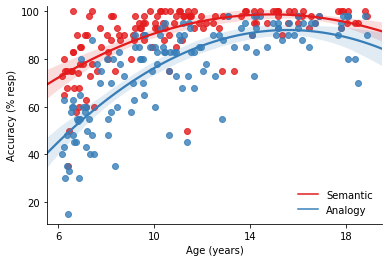

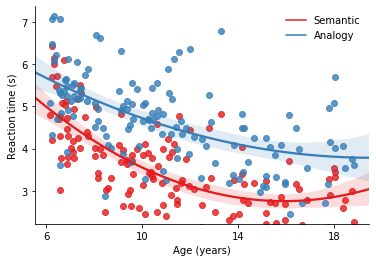

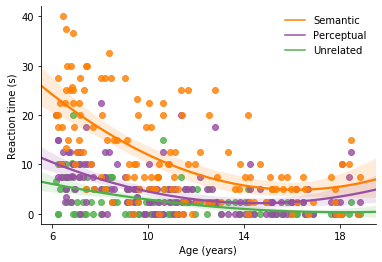

In [9]:
# Accuracy
fig, ax = plt.subplots()
ax = visan_behav_plot(ax,
                      ['R1_percent_acc', 'R2_percent_acc'], 
                      ['Semantic', 'Analogy'],
                      color_list[:2],
                      'Accuracy (% resp)',
                      legend_rev=False)
plt.show()

# Reaction time
fig, ax = plt.subplots()
ax = visan_behav_plot(ax,
                      ['R1_meanRTcorr_cor', 'R2_meanRTcorr_cor'], 
                      ['Semantic', 'Analogy'],
                      color_list[:2],
                      'Reaction time (s)',
                      legend_rev=False)
plt.show()

# Errors
fig, ax = plt.subplots()
ax = visan_behav_plot(ax,
                      ['R2_percent_dis', 'R2_percent_per', 'R2_percent_sem'], 
                      ['Unrelated', 'Perceptual', 'Semantic'],
                      color_list[2:5],
                      'Reaction time (s)',
                      legend_rev=True)
plt.show()

## Three subplots

Our last step is to put these three plots into one figure.

We can use `subplots` to set the number of equally sized plots and `figsize` to set the dimensions of the figure.

Let's see what that looks like on its own.

One thing to note is that instead of getting just one axis back now, we get an **axis list** which allows us to iterate over the three panels.

In [10]:
if not os.path.isdir('figures'):
    os.makedirs('figures')

### Save the figure

We can save this figure using `fig.savefig`.

## Panel labels

This is where I'm probably going a little overboard.
Setting the panel labels is definitely easier in any other picture editing software!!

But, it brings me great joy to make the figure entirely from code, so lets go ahead and use this function to add the panel labels.

In [11]:
def add_panel_labels_fig2(ax_list):
    """
    Add panel labels (a, b, c) to the scatter plot.
    
    Note that these positions have been calibrated by hand...
    there isn't a good way to do it otherwise.
    """
    x_list = [ -0.17, -0.1, -0.14 ]
    y = 1.1
    color='k'
    fontsize=18

    letters = string.ascii_lowercase
    for i, ax in enumerate(ax_list):

        ax.text(x_list[i], y,
                '({})'.format(letters[i]),
                fontsize=fontsize,
                transform=ax.transAxes,
                color=color,
                horizontalalignment='center',
                verticalalignment='center',
                fontname='arial',
                fontweight='bold'
        )

    return ax_list

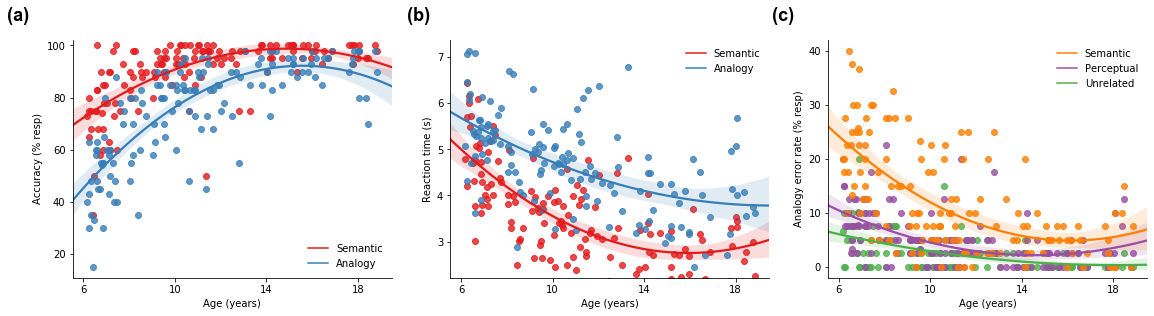

In [12]:
fig, ax_list = plt.subplots(1, 3, figsize=(16,4.5))

# Accuracy
ax = ax_list[0]
ax = visan_behav_plot(ax,
                      ['R1_percent_acc', 'R2_percent_acc'], 
                      ['Semantic', 'Analogy'],
                      color_list[:2],
                      'Accuracy (% resp)',
                      legend_rev=False)

# Reaction time
ax = ax_list[1]
ax = visan_behav_plot(ax,
                      ['R1_meanRTcorr_cor', 'R2_meanRTcorr_cor'], 
                      ['Semantic', 'Analogy'],
                      color_list[:2],
                      'Reaction time (s)',
                      legend_rev=False)

# Errors
ax = ax_list[2]
ax = visan_behav_plot(ax,
                      ['R2_percent_dis', 'R2_percent_per', 'R2_percent_sem'], 
                      ['Unrelated', 'Perceptual', 'Semantic'],
                      color_list[2:5],
                      'Analogy error rate (% resp)',
                      legend_rev=True)

ax_list = add_panel_labels_fig2(ax_list) # <-------- Add the panel labels

plt.tight_layout()
fig.savefig('figures/Figure2.png', dpi=150, bbox_inches=0)
plt.show()

## Congratulations!

We did it! 🎉🎉🎉

Look how similar these two figures look!

#### Figure 2 from GitHub repository

![](https://raw.githubusercontent.com/KirstieJane/NORA_WhitakerVendetti_DevSci2017/master/FIGURES/Figure2_lowres.png)

#### Figure 2 we've just made

![](figures/Figure2.png)


## The end

Well done 💖